In [2]:
# %conda install verstack
# %conda install category_encoders

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
import category_encoders as ce

# Categorização

<AxesSubplot:xlabel='num', ylabel='Count'>

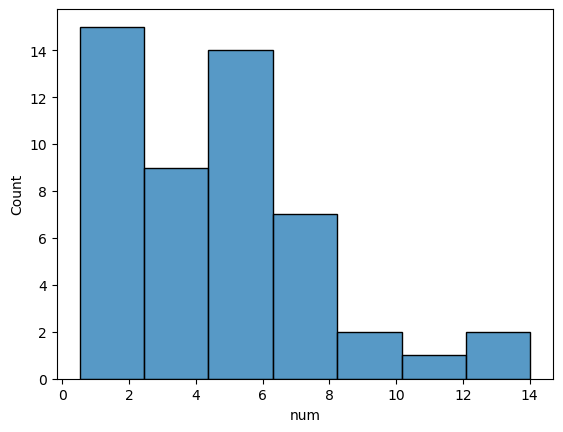

In [9]:
shape, scale = 2, 2
df = pd.DataFrame({"num": np.random.gamma(shape, scale, 50)})
sns.histplot(df["num"])

# cut

In [7]:
# https://pandas.pydata.org/docs/reference/api/pandas.cut.html#:~:text=Use%20cut%20when%20you%20need,pre%2Dspecified%20array%20of%20bins.

In [11]:
df["num_cut"] = pd.cut(df["num"], 4)
df.groupby("num_cut").count()

,num
num_cut,
"(0.5, 3.891]",21
"(3.891, 7.269]",23
"(7.269, 10.646]",3
"(10.646, 14.024]",3


In [14]:
bins = [0,2,5,np.inf]

df["num_cut"] = pd.cut(df["num"], bins)
df.groupby("num_cut").count()

,num
num_cut,
"(0.0, 2.0]",9
"(2.0, 5.0]",24
"(5.0, inf]",17


In [15]:
bins = [0,2,5,np.inf]
df["num_cut"] = pd.cut(df["num"], bins, labels = ["A","B","C"])
df.groupby("num_cut").count()

,num
num_cut,
A,9
B,24
C,17


# qcut

In [16]:
df["num_qcut"] = pd.qcut(df["num"], 2)
df.groupby("num_qcut").count()

,num,num_cut
num_qcut,,
"(0.513, 4.513]",25,25
"(4.513, 14.024]",25,25


In [17]:
df["num_qcut"] = pd.qcut(df["num"], 4, labels=["A", "B", "C","D"])
df.groupby("num_qcut").count()

,num,num_cut
num_qcut,,
A,13,13
B,12,12
C,12,12
D,13,13


# LN

In [18]:
shape, scale = 2, 0.5
x = np.random.gamma(shape, scale, 1000)
x = np.append(x,[10,15,20,21,22,25,25,30,35,35])

<AxesSubplot:ylabel='Count'>

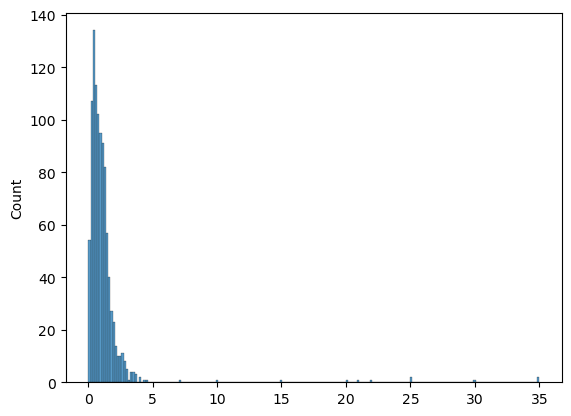

In [19]:
sns.histplot(x)

<AxesSubplot:ylabel='Count'>

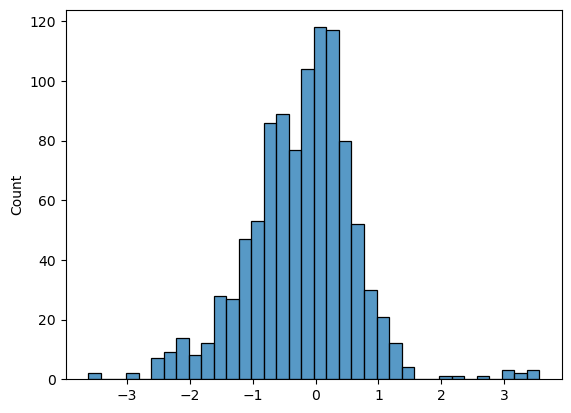

In [20]:
sns.histplot(np.log(x))

<AxesSubplot:ylabel='Count'>

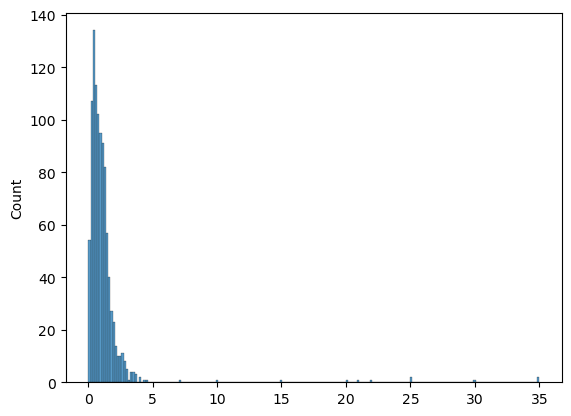

In [21]:
sns.histplot(np.exp(np.log(x)))

# MinMax

<AxesSubplot:xlabel='num', ylabel='Count'>

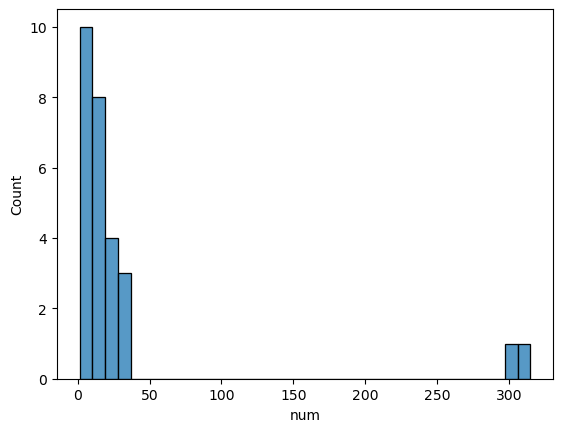

In [22]:
df = pd.DataFrame({"num":  np.append(np.random.gamma(shape, scale, 25), [20,21])*15,
                   "num2": np.random.gamma(shape, scale, 27)*15})
sns.histplot(df["num"])

<AxesSubplot:xlabel='num2', ylabel='Count'>

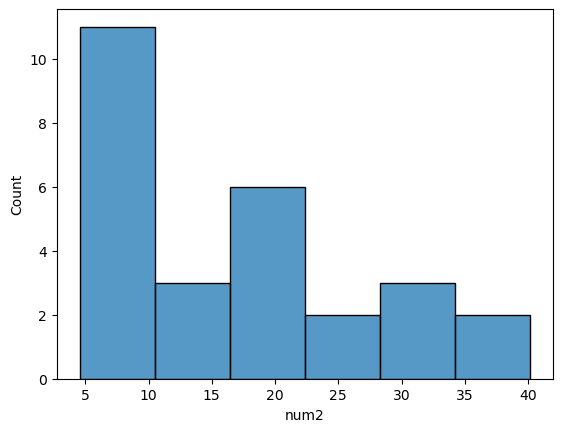

In [23]:
sns.histplot(df["num2"])

In [24]:
scaler = MinMaxScaler()
df0 = pd.DataFrame(scaler.fit_transform(df), columns = ["num","num2"])

<AxesSubplot:xlabel='num', ylabel='Count'>

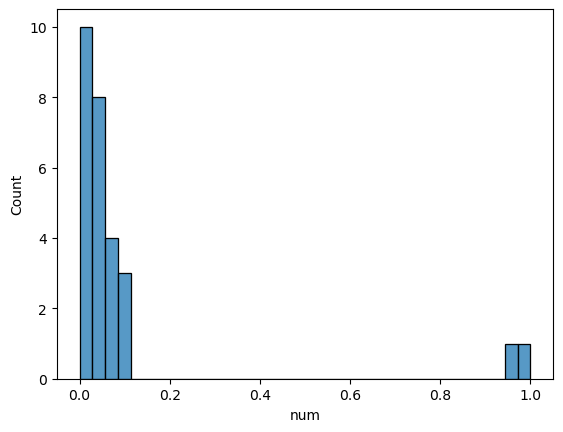

In [25]:
sns.histplot(df0["num"])

<AxesSubplot:xlabel='num2', ylabel='Count'>

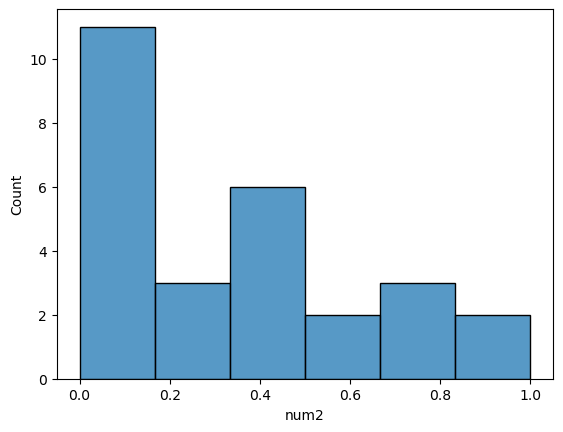

In [26]:
sns.histplot(df0["num2"])

# RobustScaler

In [27]:
scaler = RobustScaler()
df1 = pd.DataFrame(scaler.fit_transform(df), columns = ["num","num2"])

<AxesSubplot:xlabel='num', ylabel='Count'>

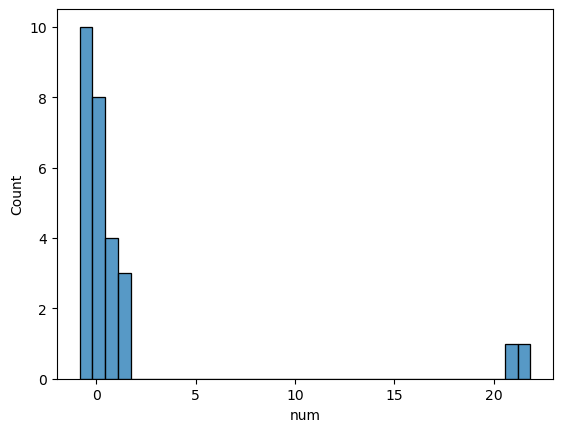

In [28]:
sns.histplot(df1["num"])

<AxesSubplot:xlabel='num2', ylabel='Count'>

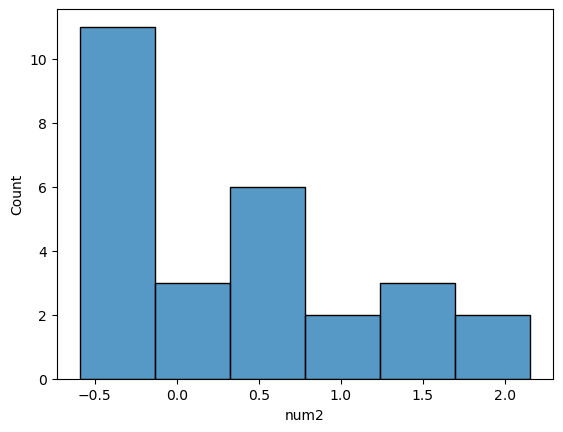

In [29]:
sns.histplot(df1["num2"])

# StandardScaler

In [30]:
scaler = StandardScaler()
df2 = pd.DataFrame(scaler.fit_transform(df), columns = ["num","num2"])

<AxesSubplot:xlabel='num', ylabel='Count'>

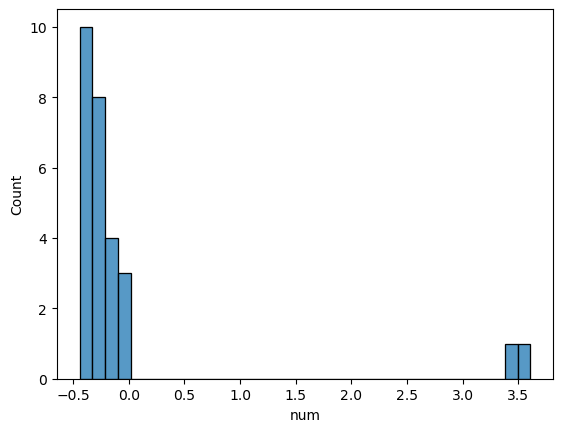

In [31]:
sns.histplot(df2["num"])

<AxesSubplot:xlabel='num2', ylabel='Count'>

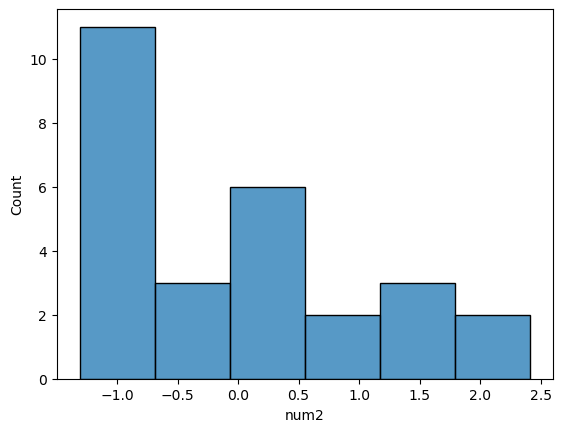

In [32]:
sns.histplot(df2["num2"])

# WoE e IV

In [33]:
np.random.seed(5257)
df_woe = pd.DataFrame({"Nota": np.random.choice(list('ABCD'),size=(50)),
                       "Perf": np.random.choice([0,1],size=(50))
})
df_woe

,Nota,Perf
0,D,1
1,C,1
2,B,0
3,A,0
4,A,0
5,A,1
6,D,0
7,A,0
8,C,0
9,B,0


In [34]:
feature, target = "Nota", "Perf"
df_woe_iv = (pd.crosstab(df_woe[feature], df_woe[target],
                      normalize = "columns")
             .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv = lambda dfx: np.sum(dfx["woe"]*
                                           (dfx[1]-dfx[0])))
             .reset_index())

df_woe_iv

Perf,Nota,0,1,woe,iv
0,A,0.347826,0.296296,-0.160343,0.265398
1,B,0.304348,0.148148,-0.719958,0.265398
2,C,0.260870,0.333333,0.245122,0.265398
3,D,0.086957,0.222222,0.938270,0.265398


# Matriz dummy

In [35]:
df_dummy = pd.DataFrame({"Classe": np.random.choice(list('ABCD'),size=(10))})
df_dummy

,Classe
0,B
1,C
2,D
3,B
4,A
5,B
6,D
7,C
8,C
9,A


In [36]:
df_dummy0 = pd.get_dummies(df_dummy["Classe"])
df_dummy0

,A,B,C,D
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,1,0,0
4,1,0,0,0
5,0,1,0,0
6,0,0,0,1
7,0,0,1,0
8,0,0,1,0
9,1,0,0,0


In [37]:
pd.concat([df_dummy, df_dummy0], axis = 1)

,Classe,A,B,C,D
0,B,0,1,0,0
1,C,0,0,1,0
2,D,0,0,0,1
3,B,0,1,0,0
4,A,1,0,0,0
5,B,0,1,0,0
6,D,0,0,0,1
7,C,0,0,1,0
8,C,0,0,1,0
9,A,1,0,0,0


# Encoders
https://contrib.scikit-learn.org/category_encoders/index.html

In [40]:
np.random.seed(5257)
df_woe = pd.DataFrame({"Nota": np.random.choice(list('ABCD'),size=(50)),
                       "Nota2": np.random.choice(list('ABCD'),size=(50)),
                       "Perf": np.random.choice([0,1],size=(50))
})
df_woe

,Nota,Nota2,Perf
0,D,D,1
1,C,D,0
2,B,C,1
3,A,C,1
4,A,C,0
5,A,B,1
6,D,A,1
7,A,C,0
8,C,A,0
9,B,A,0


In [41]:
columns = [col for col in df_woe.columns if col != "Perf"]

woe_encoder       = ce.WOEEncoder(cols = columns)
woe_encoded_train = woe_encoder.fit_transform(df_woe[columns], 
                                              df_woe["Perf"]).add_prefix("woe_")
df_woe = df_woe.join(woe_encoded_train)

woe_encoded_cols = woe_encoded_train.columns
df_woe

C:\Users\gusta\miniconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif pd.api.types.is_categorical(cols):


,Nota,Nota2,Perf,woe_Nota,woe_Nota2
0,D,D,1,0.223144,-0.287682
1,C,D,0,-0.133531,-0.287682
2,B,C,1,0.068993,0.510826
3,A,C,1,0.000000,0.510826
4,A,C,0,0.000000,0.510826
5,A,B,1,0.000000,0.356675
6,D,A,1,0.223144,-0.587787
7,A,C,0,0.000000,0.510826
8,C,A,0,-0.133531,-0.587787
9,B,A,0,0.068993,-0.587787


In [42]:
columns = [col for col in df_woe.columns if col != "Perf"]

dummy_encoder       = ce.OneHotEncoder(cols = columns)
dummy_encoded_train = dummy_encoder.fit_transform(df_woe[columns], 
                                                  df_woe["Perf"]).add_prefix("dummy_")
df_woe0 = df_woe.join(dummy_encoded_train)

dummy_encoded_cols = dummy_encoded_train.columns
df_woe0

C:\Users\gusta\miniconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif pd.api.types.is_categorical(cols):


,Nota,Nota2,Perf,woe_Nota,woe_Nota2,dummy_Nota_1,dummy_Nota_2,dummy_Nota_3,dummy_Nota_4,dummy_Nota2_1,...,dummy_Nota2_3,dummy_Nota2_4,dummy_woe_Nota_1,dummy_woe_Nota_2,dummy_woe_Nota_3,dummy_woe_Nota_4,dummy_woe_Nota2_1,dummy_woe_Nota2_2,dummy_woe_Nota2_3,dummy_woe_Nota2_4
0,D,D,1,0.223144,-0.287682,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1,C,D,0,-0.133531,-0.287682,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0
2,B,C,1,0.068993,0.510826,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,A,C,1,0.000000,0.510826,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
4,A,C,0,0.000000,0.510826,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
5,A,B,1,0.000000,0.356675,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
6,D,A,1,0.223144,-0.587787,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
7,A,C,0,0.000000,0.510826,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
8,C,A,0,-0.133531,-0.587787,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
9,B,A,0,0.068993,-0.587787,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1


#German Credit

In [45]:
german =pd.read_csv("../bases/AmostraBehavior.csv",sep=';')
german

,Id,Perf_final,UltPercLimit,Idade,N_Atraso30_59Dias,RazaoGastos,RendaMensal,N_EmeprestimosAbertos,N_atrasos_Ult90Dias,N_emprestimos,...,CAT_lnRazaoGastos,WOE_N_atrasos_Ult90Dias,WOE_N_emprestimos,WOE_N_Atraso60_89Dias,WOE_N_dependentes,WOE_CAT_UltPercLimit,WOE_CAT_Idade,WOE_CAT_RazaoGastos,WOE_CAT_lnRazaoGastos,WOE_CAT_N_EmeprestimosAbertos
0,108539,0,0.003952,56,1,0.264166,14100.0,5,0,2,...,2,0.396398,0.199208,0.290109,-0.193107,1.270830,-0.039102,0.198561,0.198561,0.159293
1,149881,0,0.084764,51,0,0.760993,5116.0,11,0,3,...,4,0.396398,-0.041143,0.290109,0.147208,0.875943,-0.039102,-0.423260,-0.423260,0.129020
2,127669,0,0.008363,63,0,0.229080,5783.0,5,0,1,...,2,0.396398,0.276278,0.290109,0.147208,1.270830,0.459374,0.198561,0.198561,0.159293
3,66332,0,0.011196,24,0,0.000000,10200.0,2,0,5,...,1,0.396398,-0.249568,0.290109,0.147208,1.270830,-0.509114,0.062296,0.062296,-0.360182
4,120592,0,0.776859,42,1,0.415677,20130.0,21,0,3,...,3,0.396398,-0.041143,0.290109,0.147208,-1.251949,-0.254073,0.081338,0.081338,-0.000105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72242,69399,0,0.015057,63,0,0.162416,9567.0,9,0,1,...,2,0.396398,0.276278,0.290109,-0.091080,1.270830,0.459374,0.198561,0.198561,0.235085
72243,68939,0,0.672849,32,0,0.410078,2440.0,7,0,5,...,3,0.396398,-0.249568,0.290109,0.147208,-0.034538,-0.509114,0.081338,0.081338,0.159293
72244,61713,0,0.628999,48,1,0.314815,10583.0,11,0,3,...,3,0.396398,-0.041143,0.290109,-0.193107,-0.034538,-0.254073,0.081338,0.081338,0.129020
72245,125632,0,0.498360,57,0,0.602863,3212.0,5,0,1,...,4,0.396398,0.276278,0.290109,-0.091080,-0.034538,0.459374,-0.423260,-0.423260,0.159293
